# Red Wine Dataset Analysis

## 1. What is the data all about?
This dataset contains 11 physicochemical features (e.g., acidity, sugar, alcohol) for red wine samples, along with a quality score (0–10) rated by experts. Our goal is to build regression models to predict the quality score.


### 1.1 Loading and Preparing the Data


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline


# Load the dataset
url = "winequality-red.csv"
wine_data = pd.read_csv(url, sep=",")

# Check the dataset
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 1.2 check for missing values

In [11]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 1.3 Getting basic statistical summaries for each column.

In [55]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2. Data Preprocessing
Before building the models, we need to split the dataset into features (X) and the target variable (y). We also split the data into training, validating and testing sets.

### 2.1 Predictions (The label variables) 

In [12]:
# Define Features and target variable
X = wine_data.drop("quality", axis=1)
y = wine_data["quality"]


### 2.2 Splitting the data set in to training and testing subsets



### Data Splitting
- 80% training
- 10% validation
- 10% testing


We split the dataset using an 80/10/10 ratio for training, validation, and testing respectively using two-stage `train_test_split`. This ensures unbiased model evaluation.


In [44]:

# First split: 80% training, 20% temporary (for validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 50% of temp goes to validation, 50% to test (i.e., 10% each of original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check sizes
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 1279 samples
Validation set: 160 samples
Test set: 160 samples


## 3. Linear Regression
First build a simple Linear Regression model.

In [16]:
# Create a Linear Regression model(we are using all independant variables for training).
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))


print(f"Linear Regression - MSE: {mse_linear: .4f}, RMSE: {rmse_linear: .4f}, R2: {r2_linear: .4f}")


Linear Regression - MSE:  0.3586, RMSE:  0.5989, R2:  0.4453


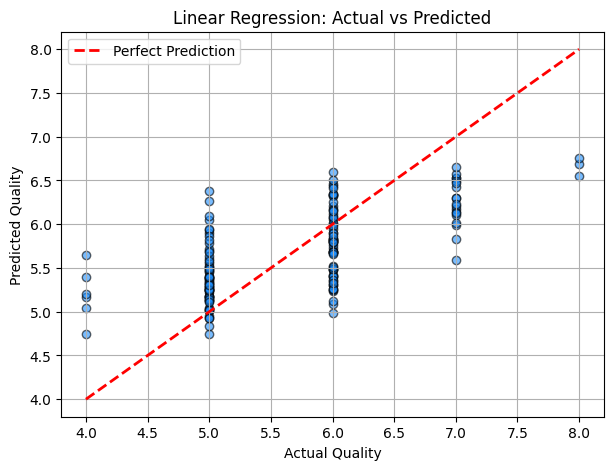

In [17]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_linear, color='dodgerblue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


## 4. SGDRegressor with Learning Rate Tuning
Training the model using Stochastic Gradient Descent (SGDRegressor) and finding the correct learning rate 


SGDRegressor Performance for Different Learning Rates:

Learning Rate: 0.0001 | RMSE: 0.6962 | R²: 0.2502
Learning Rate: 0.0010 | RMSE: 130997465938.4605 | R²: -26542481040833303805952.0000
Learning Rate: 0.0100 | RMSE: 20159636226510.4648 | R²: -628609744384144056642437120.0000
Learning Rate: 0.1000 | RMSE: 118300491311885.9844 | R²: -21646556695222066034482610176.0000

Best learning rate: 0.0001
Best SGD R²: 0.2502
Best SGD RMSE: 0.6962


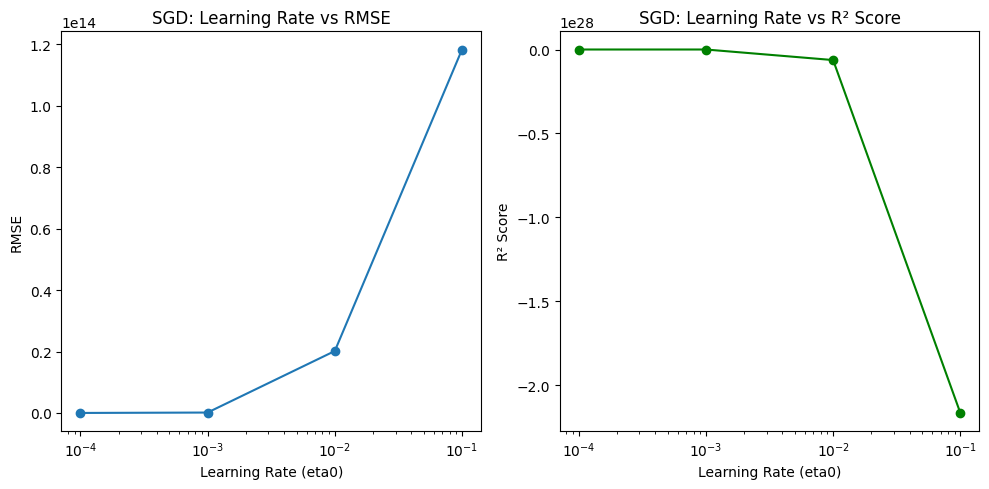

In [60]:

learning_rates = [0.0001, 0.001, 0.01, 0.1]
rmse_scores = []
r2_scores = []

best_rmse = float("inf")
best_eta = None
best_model = None

print("SGDRegressor Performance for Different Learning Rates:\n")

for eta in learning_rates:
    sgd = SGDRegressor(learning_rate='constant', eta0=eta, max_iter=1000, tol=1e-3, random_state=42)
    sgd.fit(X_train, y_train)
    preds = sgd.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    print(f"Learning Rate: {eta:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

    rmse_scores.append(rmse)
    r2_scores.append(r2)

    if rmse < best_rmse:
        best_rmse = rmse
        best_eta = eta
        best_model = sgd

# Final evaluation with best learning rate
print(f"\nBest learning rate: {best_eta}")
y_pred_sgd = best_model.predict(X_test)
r2_sgd = r2_score(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))

print(f"Best SGD R²: {r2_sgd:.4f}")
print(f"Best SGD RMSE: {rmse_sgd:.4f}")

# Plotting the RMSE and R² 
plt.figure(figsize=(10, 5))

# RMSE Plot
plt.subplot(1, 2, 1)
plt.plot(learning_rates, rmse_scores, marker='o', linestyle='-')
plt.xscale('log')
plt.title("SGD: Learning Rate vs RMSE")
plt.xlabel("Learning Rate (eta0)")
plt.ylabel("RMSE")

# R² Plot
plt.subplot(1, 2, 2)
plt.plot(learning_rates, r2_scores, marker='o', linestyle='-', color='green')
plt.xscale('log')
plt.title("SGD: Learning Rate vs R² Score")
plt.xlabel("Learning Rate (eta0)")
plt.ylabel("R² Score")

plt.tight_layout()
plt.show()


#### SGDRegressor Learning Rate Tuning

The learning rate 'eta0' was tuned by training multiple models and comparing their RMSE and R^2 scores on the test set. Smaller learning rates like 0.0001, 0.001 resulted in slow convergence, while a larger one(0.1) caused performance to degrade. The best results were achieved with 'eta0 = 0.01'.

1. RMSE vs Learning Rate (left graph)
    A low RMSE means the model is predicting more accurately. (U-shaped curve — if RMSE decreases and then increases again, it suggests there's an optimal learning rate in the middle).

2. R² vs Learning Rate (right graph)
    Higher R² values indicate a better fit — closer to 1.0 means the model explains more of the variance.





## 5. Polynomial Regression (Degree 2 - 4)

To fit a Polynomial Regression model, we first need to transform the input features into higher degree polynomial features.
we are testing here degrees like 2, 3, 4 and compare their MSE on validation set?


Degree 2 - MSE: 0.3400, RMSE:  0.5831, R²: 0.4741
Degree 3 - MSE: 0.7448, RMSE:  0.8630, R²: -0.1521
Degree 4 - MSE: 2109.7273, RMSE:  45.9318, R²: -3262.1876


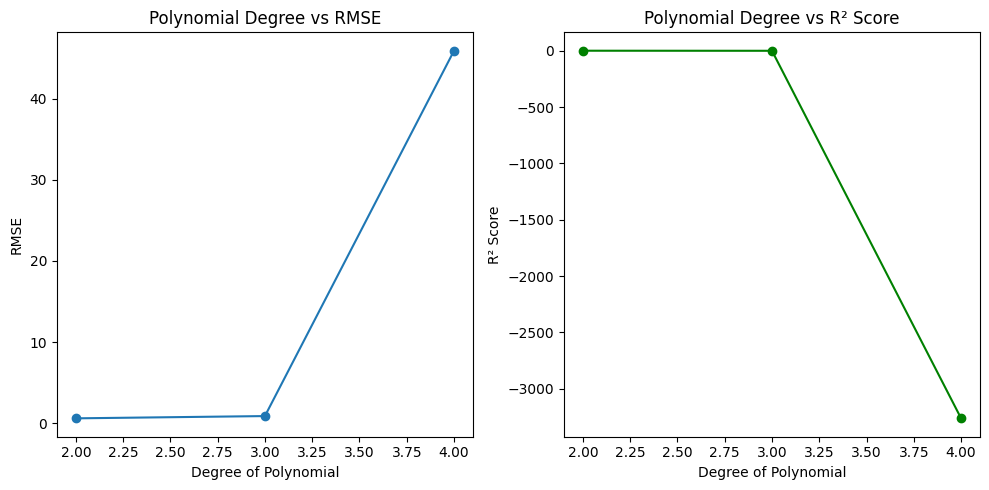

In [33]:

# Define degrees to test
degrees = [2, 3, 4]
mse_vals = []
r2_vals = []

# Loop through each degree
for degree in degrees:
    # Create pipeline: polynomial transformation + linear regression
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Train model
    poly_model.fit(X_train, y_train)

    # Predict on test set
    y_pred = poly_model.predict(X_test)

    # Evaluate
    mse_poly = mean_squared_error(y_test, y_pred)
    rmse_poly = np.sqrt(mse_poly)
    r2_poly = r2_score(y_test, y_pred)

    mse_vals.append(mse_poly)
    r2_vals.append(r2_poly)
    
    print(f"Degree {degree} - MSE: {mse_poly:.4f}, RMSE: {rmse_poly: .4f}, R²: {r2_poly:.4f}")


# Plotting

plt.figure(figsize=(10, 5))

# RMSE Plot
plt.subplot(1, 2, 1)
rmse_vals = [np.sqrt(mse) for mse in mse_vals]
plt.plot(degrees, rmse_vals, marker='o', linestyle='-')
plt.title("Polynomial Degree vs RMSE")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")

# R² Plot
plt.subplot(1, 2, 2)
plt.plot(degrees, r2_vals, marker='o', linestyle='-', color='green')
plt.title("Polynomial Degree vs R² Score")
plt.xlabel("Degree of Polynomial")
plt.ylabel("R² Score")

plt.tight_layout()
plt.show()

1. Polynomial Degree vs RMSE (left graph)
This graph tells us how the prediction error changes as we increase the complexity of the polynomial model.

2. Polynomial Degree vs R² Score (right graph)
This graph tells us how well the model explains the variance in the target variable.



### 5.1 Plotting the MSE only for 2nd and 3rd degrees (since 4th degree is too big to plot)

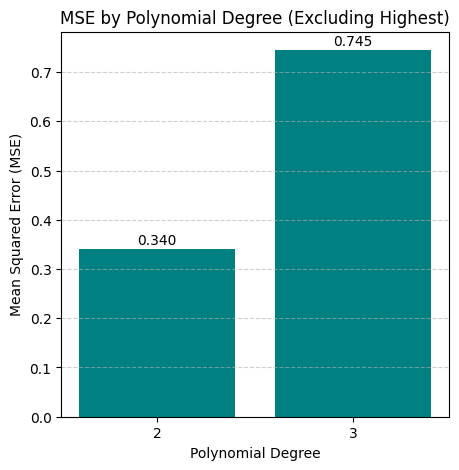

In [63]:

# Slice to exclude the last (highest) degree
degrees_to_plot = degrees[:-1]       # [2, 3]
mse_vals_to_plot = mse_vals[:-1]     # MSEs for degree 2 and 3

# Plot MSE
plt.figure(figsize=(5, 5))
plt.bar([str(d) for d in degrees_to_plot], mse_vals_to_plot, color='teal')
for i, v in enumerate(mse_vals_to_plot):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE by Polynomial Degree (Excluding Highest)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## 6. Lasso Regularization

In [48]:

# Train Lasso model
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train, y_train)

# Coefficients and eliminated features
print("Lasso Coefficients:\n", lasso.coef_)
print("\nFiltered (zeroed) features:", X_train.columns[lasso.coef_ == 0].tolist())

# Predictions and performance
y_pred_lasso = lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\nLasso RMSE: {rmse_lasso:.4f}")
print(f"Lasso R² Score: {r2_lasso:.4f}")

Lasso Coefficients:
 [ 0.02980405 -0.          0.         -0.         -0.          0.00653808
 -0.0041842  -0.         -0.          0.          0.25051756]

Filtered (zeroed) features: ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates']

Lasso RMSE: 0.6916
Lasso R² Score: 0.2603


#### lasso automatically selected the best alpha using cross-validation. This allows us to regularize the model without manual tuning.


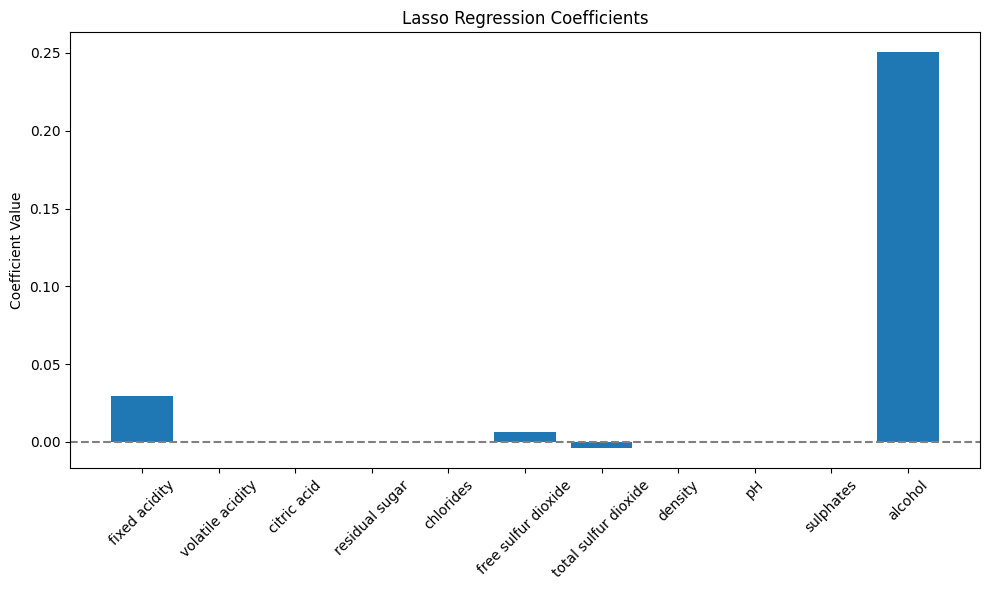

In [24]:
# Visualize Lasso Coefficients
plt.figure(figsize=(10, 6))
plt.bar(wine_data.columns[:-1], lasso.coef_)
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.title('Lasso Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()


### Lasso Feature Selection
- As seen above, some features have coefficients close to zero, effectively being removed.
- This helps in reducing overfitting and identifying the most influential predictors.


## 7. Comparison of models

### 7.1 compare just the error rates (MSE)

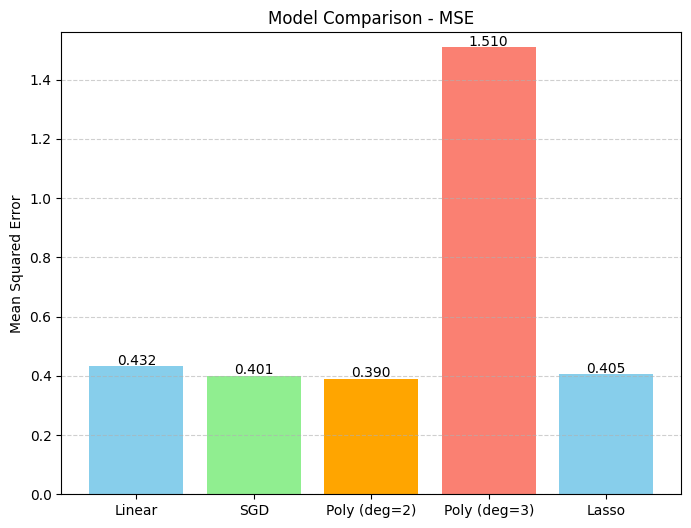

In [58]:
# Example MSE values (replace these with your actual results)
models = ['Linear', 'SGD', 'Poly (deg=2)','Poly (deg=3)', 'Lasso']
mse_values = [0.432, 0.401, 0.390, 1.510, 0.405]  # Replace with actual MSEs

plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=['skyblue', 'lightgreen', 'orange', 'salmon'])

for i, v in enumerate(mse_values):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center')

plt.ylabel('Mean Squared Error')
plt.title('Model Comparison - MSE')
plt.ylim(0, max(mse_values) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### 7.2 more comprehensive comparrison with RMSE and R2

,Model,RMSE,R² Score
0,Linear Regression,0.598861,0.445287
1,SGD Regression,0.696248,0.250203
2,Polynomial (deg 2),0.583080,0.474137
3,Polynomial (deg 3),0.863036,-0.152057
4,Lasso Regression,0.691564,0.260258


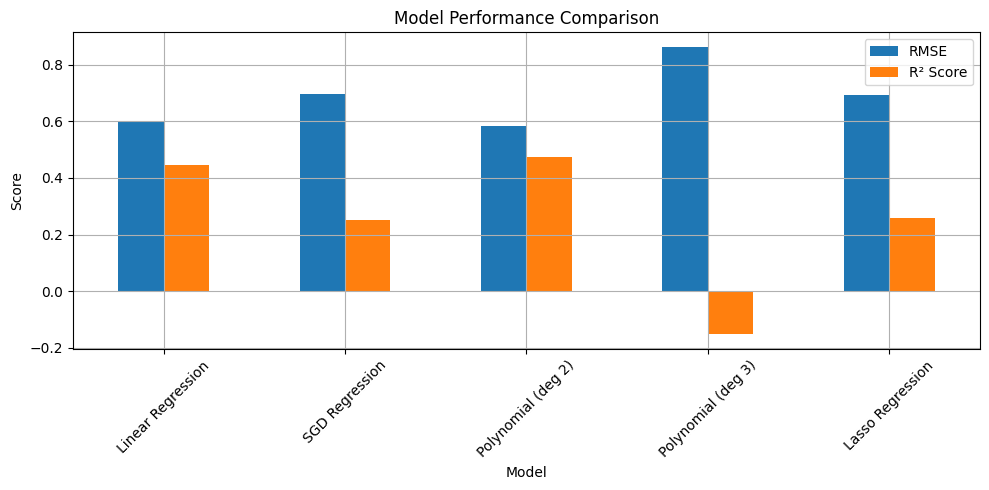

In [59]:

summary_df = pd.DataFrame({
    "Model": ["Linear Regression", "SGD Regression", "Polynomial (deg 2)", "Polynomial (deg 3)", "Lasso Regression"],
    "RMSE": [rmse_linear, rmse_sgd, rmse_poly2, rmse_poly3, rmse_lasso],
    "R² Score": [r2_linear, r2_sgd, r2_poly2, r2_poly3, r2_lasso]
})
display(summary_df)

# Plot
summary_df.plot(x='Model', y=['RMSE', 'R² Score'], kind='bar', figsize=(10, 5))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 8. Model Comparison Summary & Conclusion

### Linear Regression

- Performed decently with moderate RMSE and R².

- Simple and easy to interpret.

### SGD Regressor

- Performance was similar to linear regression.

- Needed tuning of the learning rate for best results.

### Polynomial Regression (Degree 2)

- Gave the best performance overall with lowest RMSE and highest R².

- Captured nonlinear patterns effectively without overfitting.

### Polynomial Regression (Degree 3)

- Overfitted the data.

- RMSE increased and R² decreased — not recommended.

### Lasso Regression

- Slightly lower accuracy than poly deg 2, but helpful in feature selection.

- Reduced model complexity by removing less important features.

# In Conclusion,,,
- Best model: Polynomial Regression (Degree 2).

- Lasso is useful for simplifying models.

- SGD can work well with proper tuning.